In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

df = pd.read_csv("hf://datasets/nprak26/remote-worker-productivity/remote_work_productivity.csv")
# df

In [ ]:
# various plots for eda

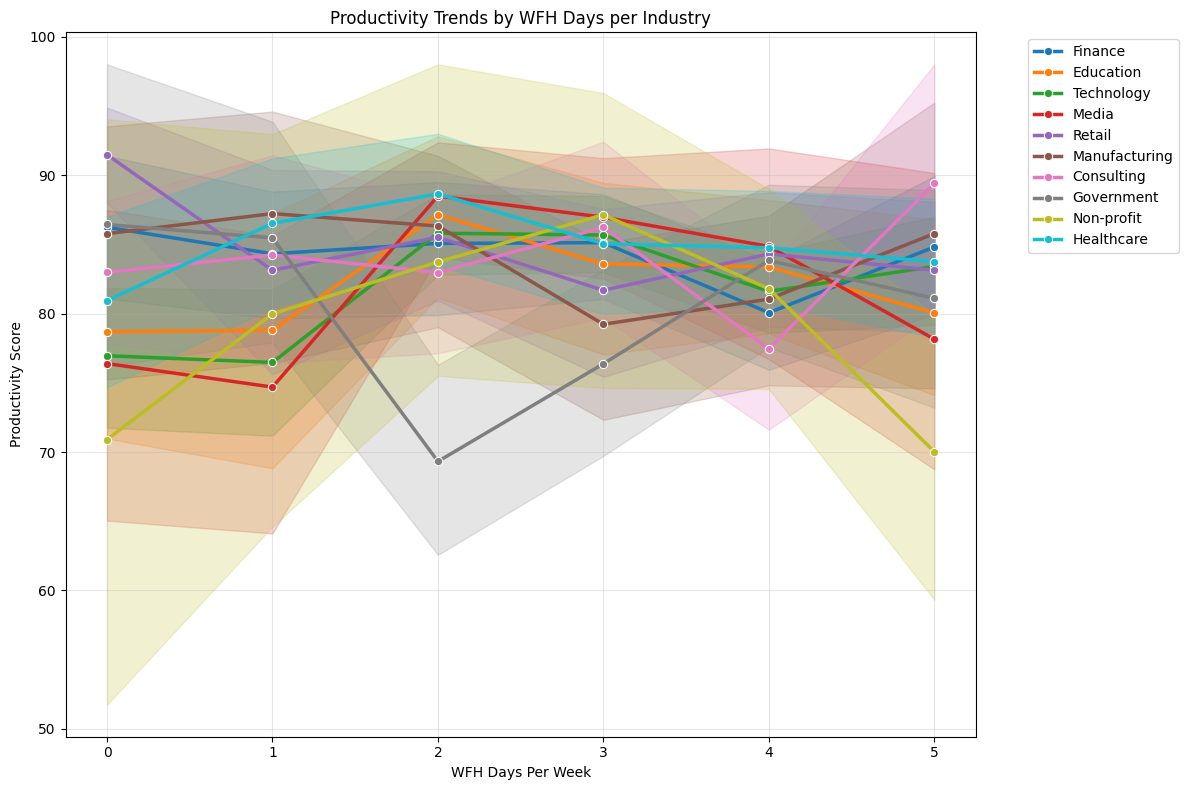

In [15]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='WFH_Days_Per_Week', y='Productivity_Score', hue='Industry', marker='o', linewidth=2.5)
plt.title('Productivity Trends by WFH Days per Industry')
plt.xlabel('WFH Days Per Week')
plt.ylabel('Productivity Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

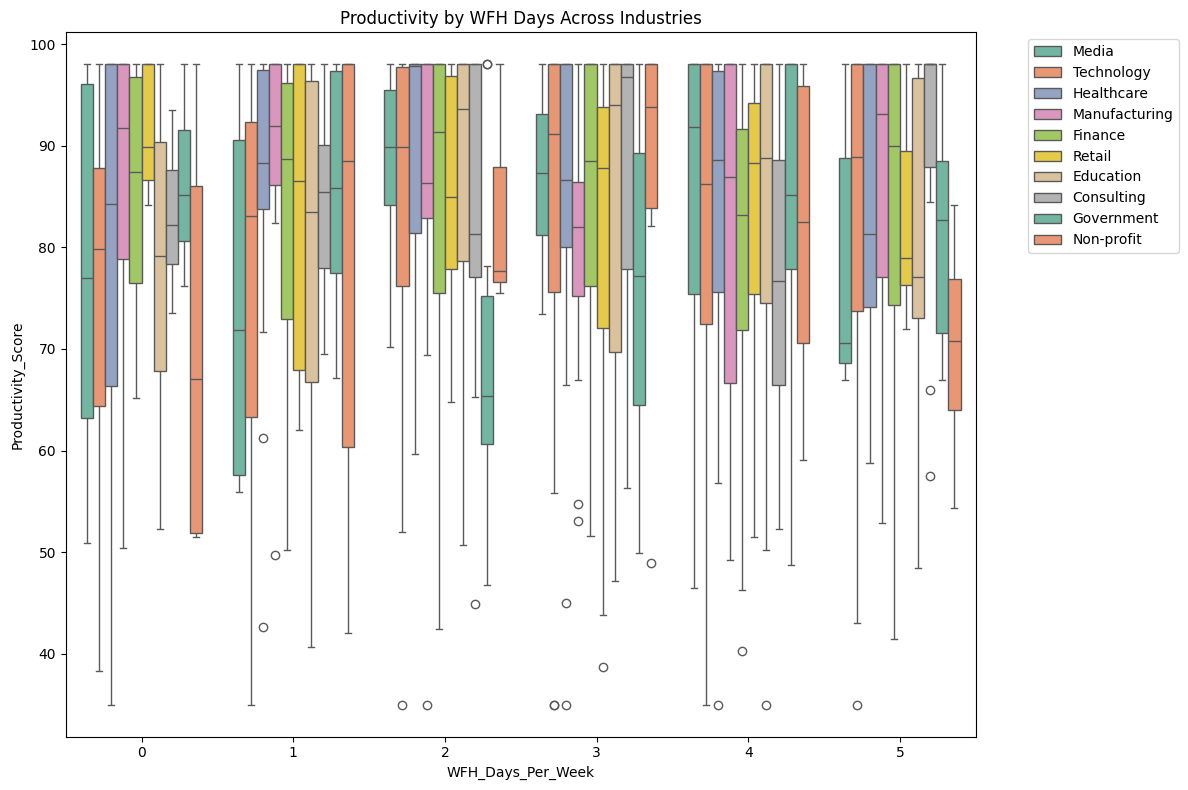

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='WFH_Days_Per_Week', y='Productivity_Score', hue='Industry', palette='Set2')
plt.title('Productivity by WFH Days Across Industries')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

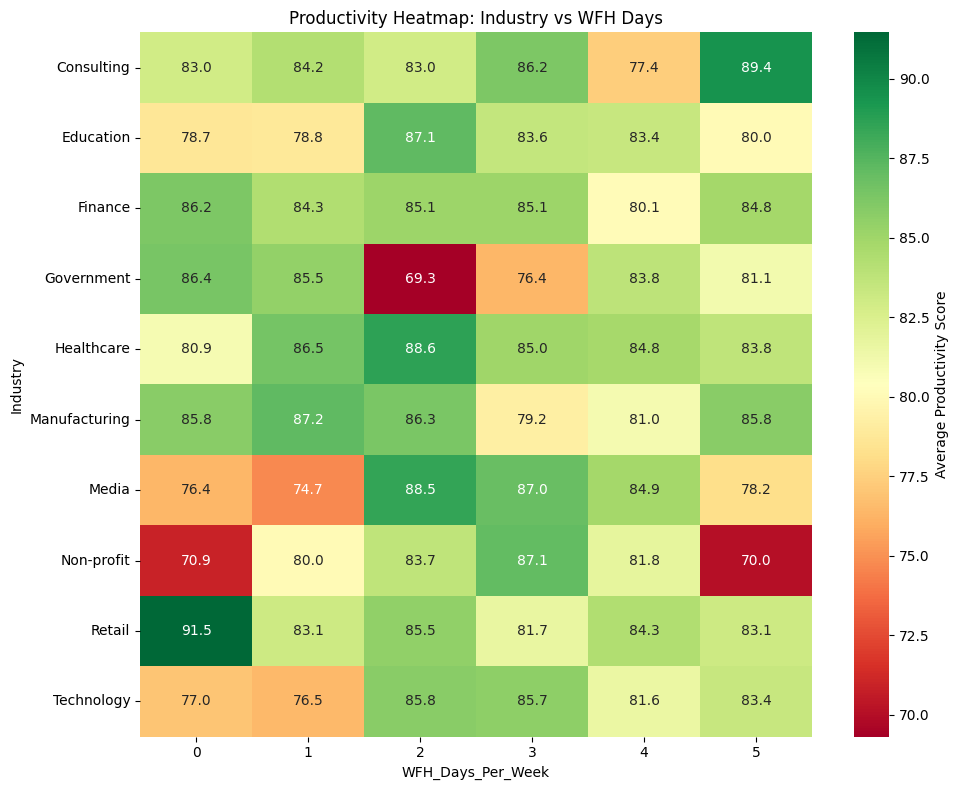

In [14]:
plt.figure(figsize=(10, 8))
pivot_data = df.pivot_table(values='Productivity_Score', index='Industry', columns='WFH_Days_Per_Week', aggfunc='mean')
sns.heatmap(pivot_data, annot=True, fmt='.1f', cmap='RdYlGn', cbar_kws={'label': 'Average Productivity Score'})
plt.title('Productivity Heatmap: Industry vs WFH Days')
plt.tight_layout()
plt.show()

/var/folders/n_/dm8l9y_j4x140yxg7r_r6b9m0000gn/T/ipykernel_56582/2831490943.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ind_plot = sns.barplot(x=industry_productivity.values, y=industry_productivity.index, palette='viridis')


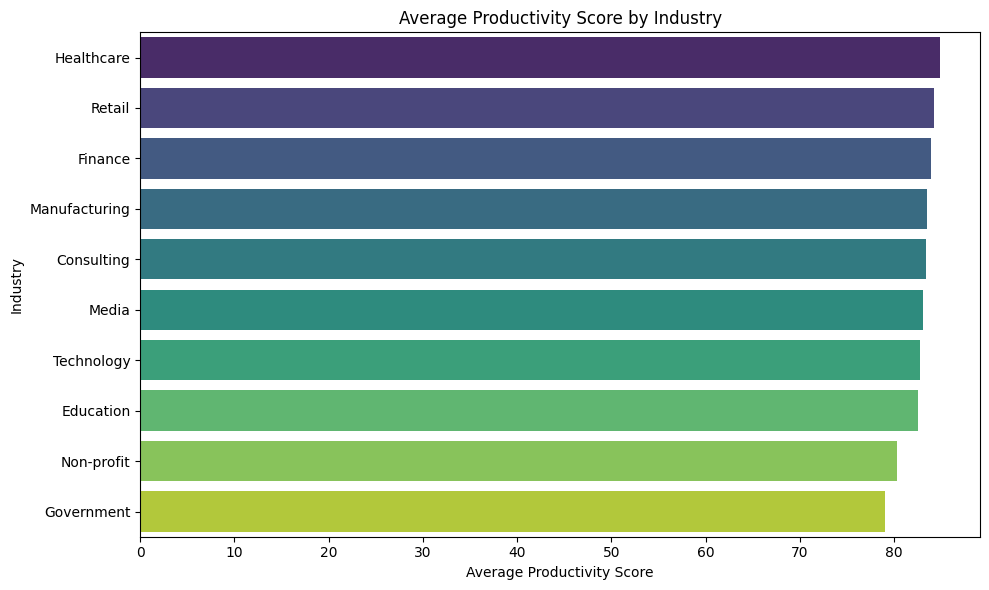

In [16]:
plt.figure(figsize=(10, 6))
industry_productivity = df.groupby('Industry')['Productivity_Score'].mean().sort_values(ascending=False)
ind_plot = sns.barplot(x=industry_productivity.values, y=industry_productivity.index, palette='viridis')
ind_plot.set_xlabel('Average Productivity Score')
ind_plot.set_ylabel('Industry')
plt.title('Average Productivity Score by Industry')
plt.tight_layout()
plt.show()

/var/folders/n_/dm8l9y_j4x140yxg7r_r6b9m0000gn/T/ipykernel_56582/1203154032.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Work_Type', y='Productivity_Score', palette=['coral', 'lightblue'])


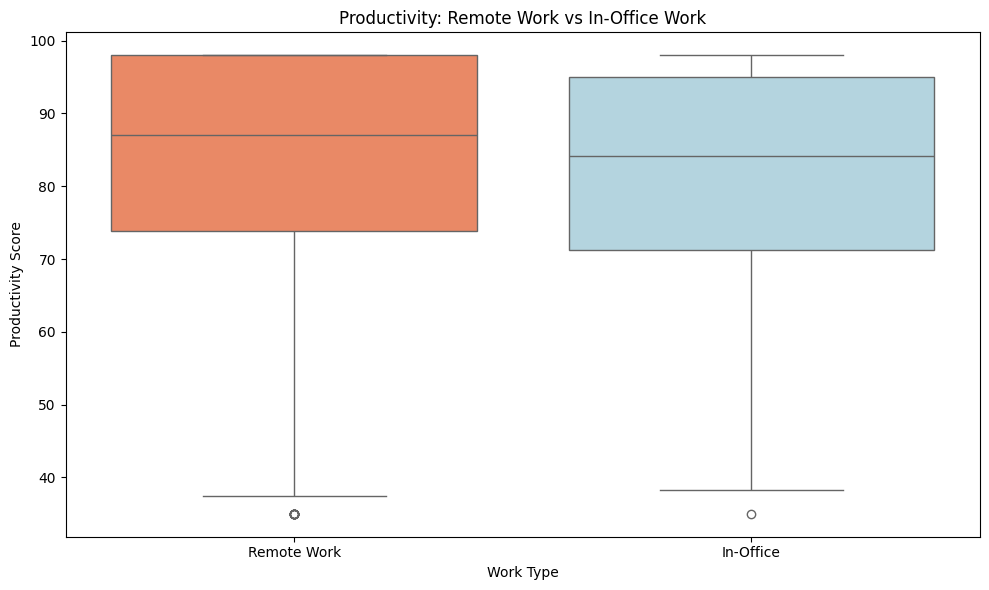

In [20]:
plt.figure(figsize=(10, 6))
df['Work_Type'] = df['WFH_Days_Per_Week'].apply(lambda x: 'Remote Work' if x > 0 else 'In-Office')
sns.boxplot(data=df, x='Work_Type', y='Productivity_Score', palette=['coral', 'lightblue'])
plt.title('Productivity: Remote Work vs In-Office Work')
plt.ylabel('Productivity Score')
plt.xlabel('Work Type')
plt.tight_layout()
plt.show()

/var/folders/n_/dm8l9y_j4x140yxg7r_r6b9m0000gn/T/ipykernel_56582/2406361033.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wfh_productivity.index, y=wfh_productivity.values, palette='viridis')


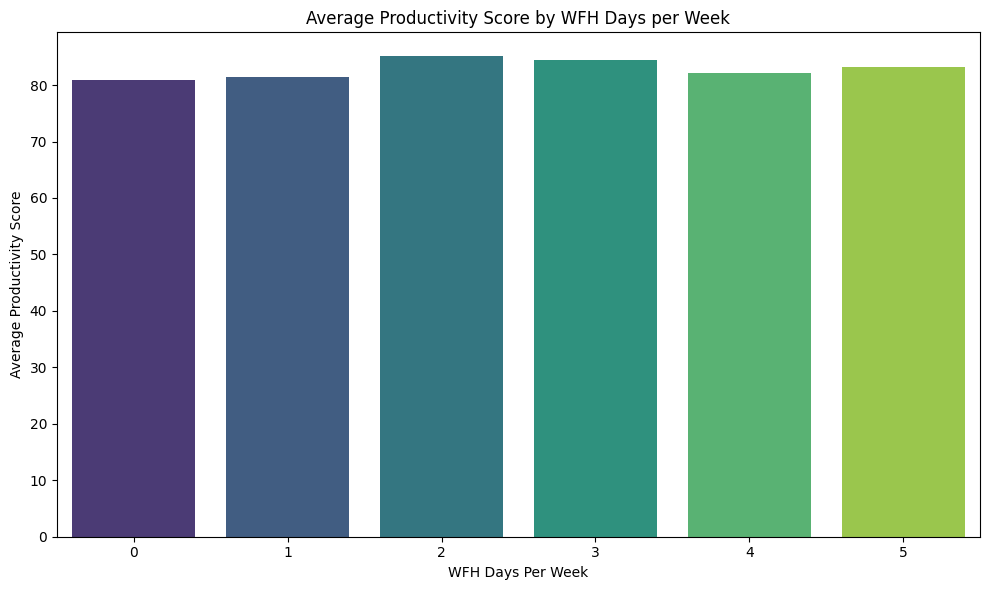

In [21]:
plt.figure(figsize=(10, 6))
wfh_productivity = df.groupby('WFH_Days_Per_Week')['Productivity_Score'].mean()
sns.barplot(x=wfh_productivity.index, y=wfh_productivity.values, palette='viridis')
plt.title('Average Productivity Score by WFH Days per Week')
plt.xlabel('WFH Days Per Week')
plt.ylabel('Average Productivity Score')
plt.tight_layout()
plt.show()

In [5]:
grouped = (
    df.groupby(['WFH_Days_Per_Week', 'Efficiency_Rating', 'Industry'])
    .size()
    .reset_index(name='Count')
)

import random
random.seed(42)
industry_colors = {ind: "#{:06x}".format(random.randint(0, 0xFFFFFF)) for ind in df['Industry'].unique()}
grouped['Color'] = grouped['Industry'].map(industry_colors)

data = go.Scatter(
    x=grouped['WFH_Days_Per_Week'],
    y=grouped['Efficiency_Rating'],
    mode='markers',
    marker=dict(
        size=grouped['Count'] * 5,
        color=grouped['Color'],
        sizemode='area',
        sizeref=2.*max(grouped['Count'])/(100.**2),
    ),
    text=[
        f"Industry: {ind}<br>Count: {cnt}"
        for ind, cnt in zip(grouped['Industry'], grouped['Count'])
    ]
)

layout = go.Layout(
    title='Productivity vs Work-From-Home Days (Bubble Size = Number of Employees)',
    xaxis=dict(title='Work-From-Home Days'),
    yaxis=dict(title='Productivity Score')
)

fig = go.Figure(data = data, layout = layout)
fig.update_layout(height=800)

fig.show()

In [7]:
ranges = [(0,1), (1,2), (2,3), (3,4), (4,5)] # Define ranges of WFH days (for slider and for loop)
marital_map = {"Single": "lightcoral", "Married": "blue"} # Color map for marital_status
married_df = df[df["Marital_Status"].isin(["Married", "Single"])]
married_men_df = married_df[married_df["Gender"] == "Male"]

fig = go.Figure()
range_stats = []

for i, r in enumerate(ranges):  # One trace per WFH range, colored by marital status
    subset = married_men_df[married_men_df["WFH_Days_Per_Week"].between(r[0], r[1])] # Filter data for the current WFH range 

    #https://plotly.com/python/sliders/ 
    fig.add_trace(go.Scatter(
        x=subset["Work_Hours_Per_Week"],
        y=subset["Productivity_Score"],
        mode="markers+text",
        text=subset["Employee_ID"],
        textposition="top center",
        marker=dict(
            size=12,
            color=subset["Marital_Status"].map(marital_map),  # color by marital status
            line=dict(width=1, color="black")
        ),
        name=f"WFH {r[0]}–{r[1]} days",
        visible=(i==0)  # only show the first WFH range initially
    ))

steps = [] # Create and add slider steps
for i, r in enumerate(ranges):

    grp = subset.groupby("Marital_Status")["Productivity_Score"].agg(["mean", "count"])
    
    married_mean = grp.loc["Married", "mean"] if "Married" in grp.index else np.nan
    single_mean  = grp.loc["Single", "mean"]  if "Single"  in grp.index else np.nan
    married_n    = grp.loc["Married", "count"] if "Married" in grp.index else 0
    single_n     = grp.loc["Single", "count"]  if "Single"  in grp.index else 0
    
    step = dict(
        method="update",
        args=[{"visible": [j==i for j in range(len(ranges))]},
              {"title": f"Work Hours vs Productivity (WFH {r[0]}–{r[1]} days) - "
        f"Married=blue, Single=lightcoral<br>"
        f"Mean productivity: Married = {married_mean:.1f} (n={married_n}), "
        f"Single = {single_mean:.1f} (n={single_n})"}], label=f"{r[0]}–{r[1]}")
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Work-From-Home Range: "},
    pad={"t": 50},
    steps=steps
)]

# Layout (https://www.geeksforgeeks.org/python/how-to-make-sliders-in-plotly/ )
fig.update_layout(
    title="Work Hours vs Productivity (WFH slider)",
    xaxis=dict(title="Weekly Work Hours"),
    yaxis=dict(title="Productivity Score"),
    sliders=sliders,
    legend_title="WFH Range"
)

fig.show()